In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Cleaned-1.csv')

In [3]:
df.isnull().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df['Outlet_Size'].fillna(method='bfill',inplace=True)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
top10Items = (df.Item_Identifier.value_counts().sort_values(ascending=False)[0:10]).reset_index()
top10Items=pd.DataFrame(top10Items)
top10Items

,index,Item_Identifier
0,FDW13,10
1,FDG33,10
2,NCL31,9
3,DRN47,9
4,FDO19,9
5,FDF56,9
6,FDW49,9
7,FDP25,9
8,FDX31,9
9,NCI54,9


In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
vis0=df[df['Item_Visibility']==0].index

In [9]:
df.loc[[3]]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,High,Tier 3,Grocery Store,732.38


In [10]:
for i in vis0:
    df.loc[i,'Item_Visibility']=df['Item_Visibility'].median()

In [11]:
df['Item_Visibility'].median()

0.053930934

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.700343,0.069460,140.992782,1997.831867,2181.288914
std,4.240229,0.048893,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,11.941250,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.024411,0.025386,0.048595,0.004937
Item_Visibility,-0.024411,1.000000,-0.004531,-0.078271,-0.134095
Item_MRP,0.025386,-0.004531,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.048595,-0.078271,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.004937,-0.134095,0.567574,-0.049135,1.000000


In [15]:
## drop Item_Visibility due to it's low correlation

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

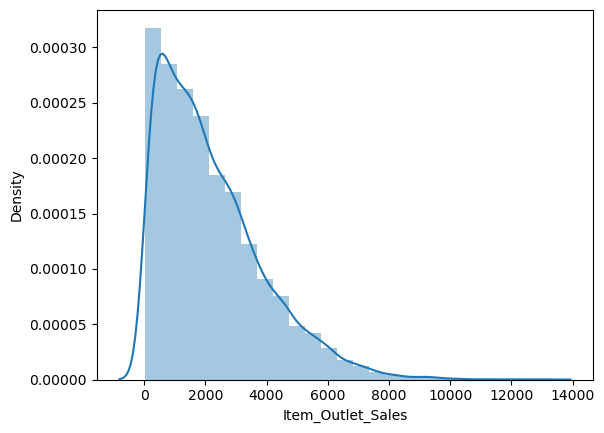

In [16]:
import seaborn as sns
sns.distplot(df['Item_Outlet_Sales'],bins=25)

In [19]:
# RIGHT SKEWED
df['Item_Outlet_Sales'].median()

1794.331

In [18]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

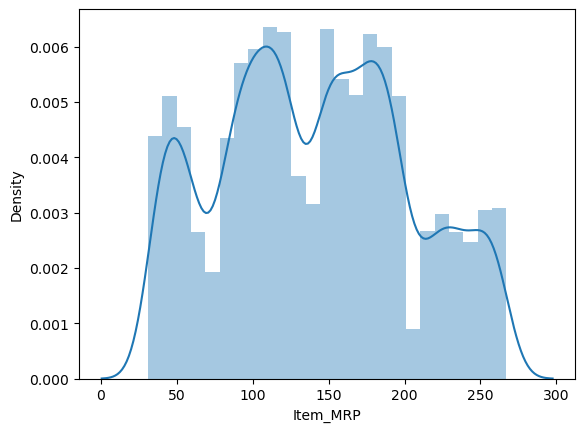

In [21]:
sns.distplot(df['Item_MRP'],bins=25)

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

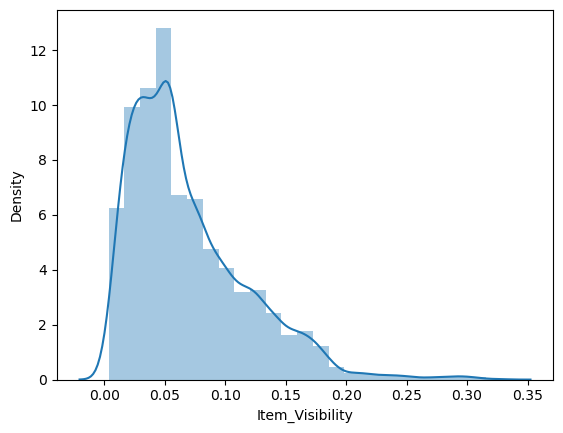

In [22]:
sns.distplot(df['Item_Visibility'],bins=25)

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

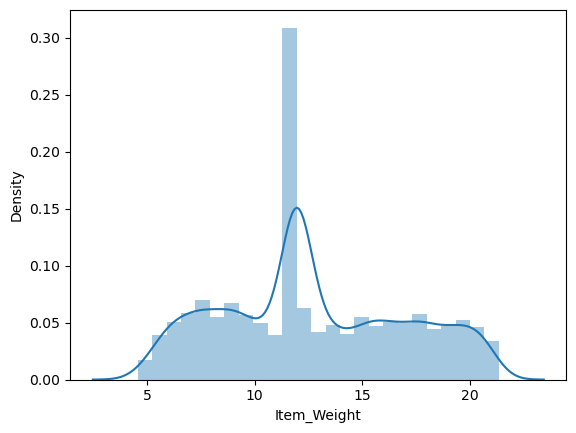

In [23]:
sns.distplot(df['Item_Weight'],bins=25)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

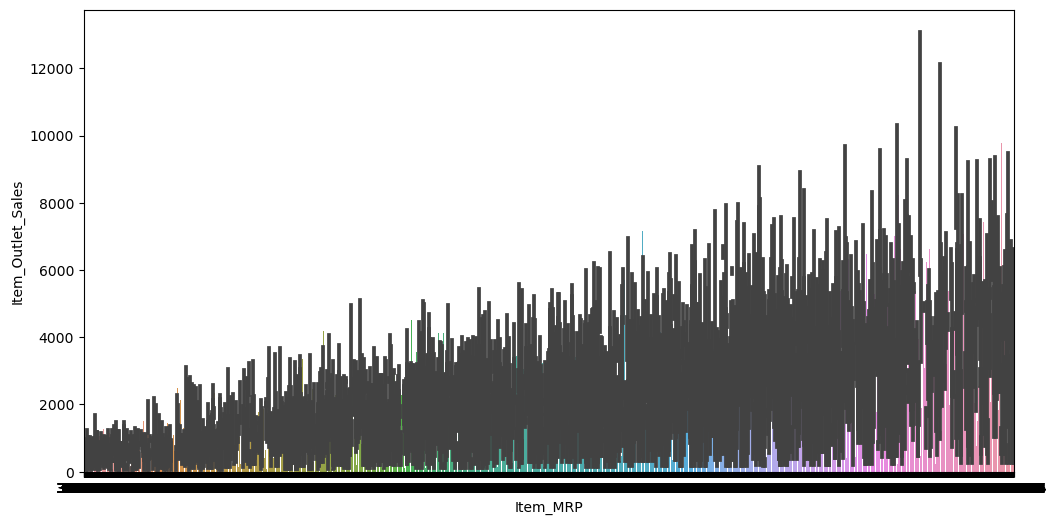

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='count'>

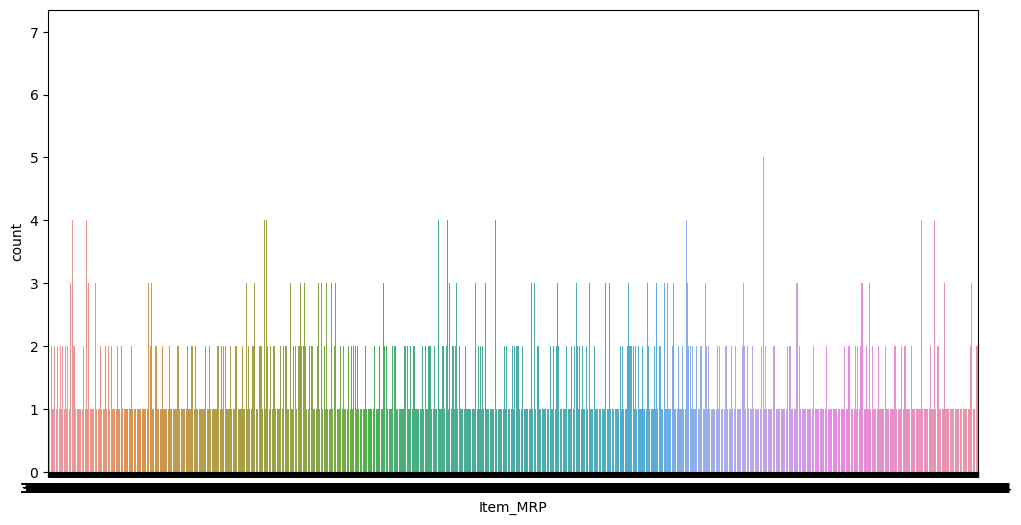

In [30]:
sns.countplot(x='Item_MRP',data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

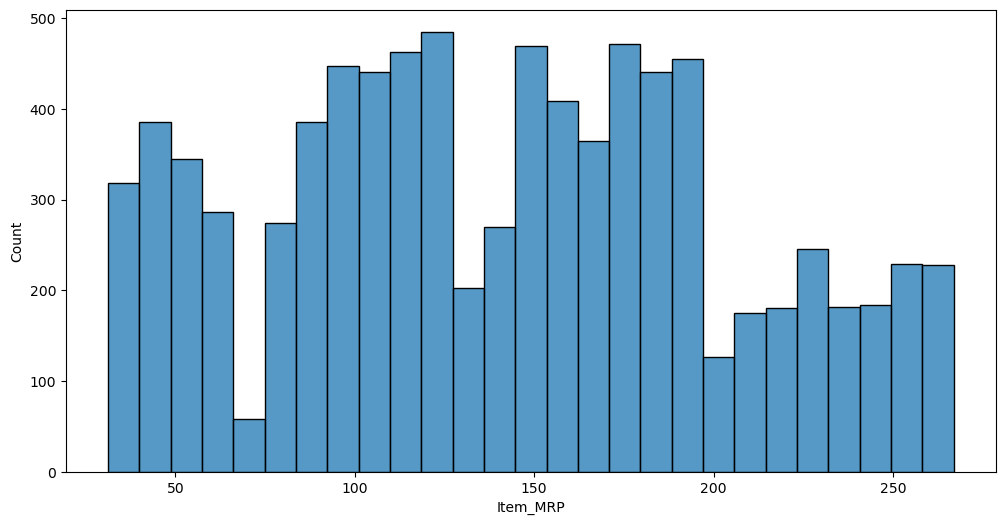

In [31]:
sns.histplot(x='Item_MRP',data=df)

In [32]:
## Feature Scaling

In [101]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,0.5,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,0.25,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,0.5,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,High,0.25,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,0.25,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,0.25,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,0.25,Supermarket Type2,1845.5976


In [97]:
final_df=df.drop('Item_Identifier',axis=1)

In [98]:
final_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,0.5,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,0.25,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,0.5,Supermarket Type1,2097.2700
3,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,High,0.25,Grocery Store,732.3800
4,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,0.25,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,0.25,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,0.25,Supermarket Type2,1845.5976


In [41]:
for i in final_df.columns:
    print('--------------------------------------------------------------')
    print(f'COLUMN: {i}')
    print(final_df[i].unique())
    print('--------------------------------------------------------------')

--------------------------------------------------------------
COLUMN: Item_Weight
[ 9.3      5.92    17.5     19.2      8.93    10.395   13.65    11.94125
 16.2     11.8     18.5     15.1     17.6     16.35     9.      13.35
 18.85    14.6     13.85    13.       7.645   11.65     5.925   19.25
 18.6     18.7     17.85    10.       8.85     9.8     13.6     21.35
 12.15     6.42    19.6     15.85     7.39    10.195    9.895   10.895
  7.905    9.195    8.365    7.97    17.7     19.35     8.645   15.6
 18.25     7.855    7.825    8.39    12.85    19.       5.905    7.76
 16.75    15.5      6.055    6.305   20.85    20.75     8.895   19.7
  8.75    13.3      8.31    19.75    17.1     10.5      6.635   14.15
  8.89     9.1      7.5     16.85     7.485   11.6     12.65    20.25
  8.6     12.6      8.88    20.5     13.5      7.235    6.92     8.02
 12.8     16.6     14.      16.      21.25     7.365   18.35     5.465
  7.27     6.155   19.5     15.2     14.5     13.1     12.3     11.1
 11.3

In [84]:
final_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [100]:
final_df['Outlet_Location_Type'].value_counts()

0.25      3350
Tier 2    2785
0.5       2388
Name: Outlet_Location_Type, dtype: int64

In [85]:
final_df['Outlet_Location_Type'].replace({'Tier 1':1.00,'Tier 2':0.50,'Tier 3':0.25},inplace=True)

In [99]:
final_df['Outlet_Size'].value_counts()

Medium    3940
Small     3290
High      1293
Name: Outlet_Size, dtype: int64

In [87]:
final_df.groupby('Outlet_Size').mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Size,,,,,
High,12.978125,0.066177,139.129507,0.304524,2147.162776
Medium,12.634548,0.066312,141.185997,0.364848,2441.709463
Small,12.669967,0.074521,141.493678,0.484119,1882.829379


In [ ]:
## ALMOST SAME VISIBILITY IN ALL TYPES OF OUTLETS

In [59]:
2147.162776/2441.709463,2441.709463/2441.709463,1882.829379/2441.709463

(0.8793686589402385, 1.0, 0.771111144684129)

In [88]:
final_df['Outlet_Location_Type'].value_counts()

0.50    5173
0.25    3350
Name: Outlet_Location_Type, dtype: int64

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 666.0+ KB


In [71]:
final_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,0.5,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,0.25,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,0.5,Supermarket Type1,2097.2700
3,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,High,0.25,Grocery Store,732.3800
4,8.930,Low Fat,0.053931,Household,53.8614,OUT013,High,0.25,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,0.25,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,0.25,Supermarket Type2,1845.5976


In [89]:
best_outlets=final_df.groupby('Outlet_Identifier').mean().sort_values(by='Item_Outlet_Sales',ascending=False)

In [90]:
best_outlets

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT027,11.941250,0.062076,139.801791,0.25,3694.038558
OUT035,12.829349,0.064395,143.122481,0.50,2438.841866
OUT049,12.917446,0.063879,140.297699,0.50,2348.354635
OUT017,12.826668,0.064696,139.421119,0.50,2340.675263
OUT013,13.006148,0.063371,141.425982,0.25,2298.995256
OUT046,12.866801,0.064002,142.057387,0.50,2277.844267
OUT045,12.649989,0.063842,140.950246,0.50,2192.384798
OUT018,12.873346,0.064792,141.678634,0.25,1995.498739
OUT019,11.941250,0.111506,139.787088,0.50,340.329723


In [72]:
## ENCODING

In [113]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
final_df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [ ]:
final_df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [114]:
final_df['Outlet_Identifier']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [115]:
final_df['Outlet_Size']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [118]:
final_df['Outlet_Type']= label_encoder.fit_transform(df['Item_Fat_Content'])

In [119]:
final_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [120]:
final_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,Dairy,249.8092,1,1,1.00,1,3735.1380
1,5.920,2,0.019278,Soft Drinks,48.2692,2,2,0.25,2,443.4228
2,17.500,1,0.016760,Meat,141.6180,1,1,1.00,1,2097.2700
3,19.200,2,0.053931,Fruits and Vegetables,182.0950,2,2,0.25,2,732.3800
4,8.930,1,0.053931,Household,53.8614,1,1,0.25,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,Snack Foods,214.5218,1,1,0.25,1,2778.3834
8519,8.380,2,0.046982,Baking Goods,108.1570,2,2,0.50,2,549.2850
8520,10.600,1,0.035186,Health and Hygiene,85.1224,1,1,0.50,1,1193.1136
8521,7.210,2,0.145221,Snack Foods,103.1332,2,2,0.25,2,1845.5976


In [121]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   int32  
 6   Outlet_Size           8523 non-null   int32  
 7   Outlet_Location_Type  8523 non-null   float64
 8   Outlet_Type           8523 non-null   int32  
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(5), int32(4), object(1)
memory usage: 532.8+ KB


In [103]:
temp=pd.read_csv('Train.csv')

In [105]:
final_df['Outlet_Location_Type']=temp['Outlet_Location_Type']

In [108]:
final_df['Outlet_Location_Type'].replace({'Tier 1':1.00,'Tier 2':0.50,'Tier 3':0.25},inplace=True)

In [111]:
final_df['Outlet_Location_Type'].value_counts()

0.25    3350
0.50    2785
1.00    2388
Name: Outlet_Location_Type, dtype: int64

In [112]:
final_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1.00,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,0.25,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1.00,Supermarket Type1,2097.2700
3,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,High,0.25,Grocery Store,732.3800
4,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,0.25,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,0.25,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,0.50,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,0.50,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,0.25,Supermarket Type2,1845.5976


In [137]:
final_df['Item_Outlet_Sales']=temp['Item_Outlet_Sales']

In [139]:
final_df['Item_Type']=temp['Item_Type']

In [140]:
final_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
0,9.300,1,0.016047,249.8092,1,1,1.00,1,3735.1380,Dairy
1,5.920,2,0.019278,48.2692,2,2,0.25,2,443.4228,Soft Drinks
2,17.500,1,0.016760,141.6180,1,1,1.00,1,2097.2700,Meat
3,19.200,2,0.053931,182.0950,2,2,0.25,2,732.3800,Fruits and Vegetables
4,8.930,1,0.053931,53.8614,1,1,0.25,1,994.7052,Household
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1,1,0.25,1,2778.3834,Snack Foods
8519,8.380,2,0.046982,108.1570,2,2,0.50,2,549.2850,Baking Goods
8520,10.600,1,0.035186,85.1224,1,1,0.50,1,1193.1136,Health and Hygiene
8521,7.210,2,0.145221,103.1332,2,2,0.25,2,1845.5976,Snack Foods


In [142]:
final_df.to_csv('final_df.csv')

In [141]:
copy=final_df

In [146]:
copy

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
0,9.300,1,0.016047,249.8092,1,1,1.00,1,3735.1380,Dairy
1,5.920,2,0.019278,48.2692,2,2,0.25,2,443.4228,Soft Drinks
2,17.500,1,0.016760,141.6180,1,1,1.00,1,2097.2700,Meat
3,19.200,2,0.053931,182.0950,2,2,0.25,2,732.3800,Fruits and Vegetables
4,8.930,1,0.053931,53.8614,1,1,0.25,1,994.7052,Household
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1,1,0.25,1,2778.3834,Snack Foods
8519,8.380,2,0.046982,108.1570,2,2,0.50,2,549.2850,Baking Goods
8520,10.600,1,0.035186,85.1224,1,1,0.50,1,1193.1136,Health and Hygiene
8521,7.210,2,0.145221,103.1332,2,2,0.25,2,1845.5976,Snack Foods


In [125]:
len(final_df.Item_Type.unique())

16

In [144]:
X=copy.drop(['Item_Type','Item_Outlet_Sales'],axis=1)

In [145]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,249.8092,1,1,1.00,1
1,5.92,2,0.019278,48.2692,2,2,0.25,2
2,17.50,1,0.016760,141.6180,1,1,1.00,1
3,19.20,2,0.053931,182.0950,2,2,0.25,2
4,8.93,1,0.053931,53.8614,1,1,0.25,1


In [147]:
y=copy['Item_Outlet_Sales']

In [148]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
XRF, yRF = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(XRF, yRF)

print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]
